# Basic Deep Neural Network

Importing necessary utilities from Keras library

In [1]:
import matplotlib.pyplot as plt
import numpy

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Loading the MNIST dataset

Let's explore the dataset

- **MNIST** is a dataset of handwritten digit images ranging from 0 to 9. 
- Each image is of the dimension 28x28. 
- Each pixel value in an image ranges between 0 (black) and 255 (white)
- The dataset contains 70,000 handwritten digits' images. 
- 60,000 images are arranged into training set and the remaining 10,000 images are arranged into test set. 
- Each image is associated with a label from 0 to 9.

<img src="https://cdn-images-1.medium.com/max/1600/1*UKXLbb40YjviJWerqz3D2Q.png"/>

Below, we're loading the dataset using **load_data()** function of **keras.datasets.mnist**

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
print(y_train[0])
print(y_test[0])

5
7


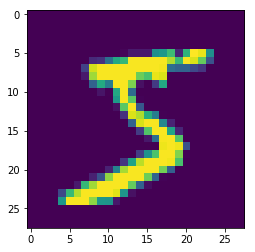

In [16]:
plt.imshow(X_train[0])
plt.show()

# Data Preparation

Since we're dealing with basic deep neural networks, we'll straigten the 28x28 matrix into one row consisting all the 784 pixel values. We'll also **normalize** the pixel values

In [17]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
print(X_train[0, 200:210])

[  0.   0.   0.  49. 238. 253. 253. 253. 253. 253.]


In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [21]:
print(X_train[0, 200:210])

[0.         0.         0.         0.19215687 0.93333334 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686]


In [23]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [24]:
print(y_train.shape)
print(y_test.shape)

print(y_train[0])
print(y_test[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Defining the model

- 1st layer has 784 nodes
- 2nd layer has 10 nodes mapped to all the possible labels from 0-9

In [25]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.5976 - acc: 0.8626 - val_loss: 0.5124 - val_acc: 0.8777
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4974 - acc: 0.8778 - val_loss: 0.4445 - val_acc: 0.8896
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.4433 - acc: 0.8871 - val_loss: 0.4042 - val_acc: 0.8953
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4087 - acc: 0.8928 - val_loss: 0.3763 - val_acc: 0.9020
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3842 - acc: 0.8974 - val_loss: 0.3569 - val_acc: 0.9047
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3655 - acc: 0.9017 - val_loss: 0.3409 - val_acc: 0.9066
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3507 - acc: 0.9048 - val_loss: 0.3288 - val_acc

# Potting the losses and accuracies throughout the training process

In [31]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0,0.5,'Loss')

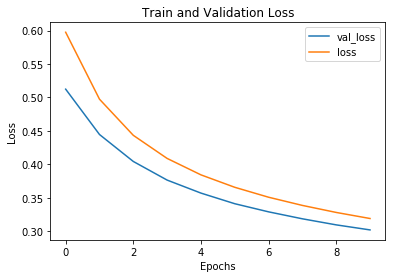

In [34]:
#fig = plt.figure((10, 5))
plt.plot(history.history['val_loss'], label="val_loss")
plt.plot(history.history['loss'], label="loss")

plt.legend(loc='best')
plt.title("Train and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0,0.5,'Accuracy')

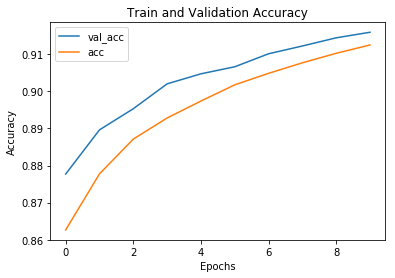

In [36]:
plt.plot(history.history['val_acc'], label="val_acc")
plt.plot(history.history['acc'], label="acc")

plt.legend(loc='best')
plt.title("Train and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [46]:
y_pred = model.predict(numpy.array([X_test[0]]))

[[1.8831989e-04 3.8401831e-06 2.0844932e-04 1.5192906e-03 2.5113581e-05
  8.2633203e-05 1.5045703e-06 9.9511886e-01 7.3687792e-05 2.7783995e-03]]
1.0000001

Predicted Label 7
Ground Truth Label 7


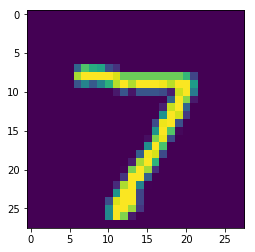

In [57]:
print(y_pred)
print(y_pred.sum())
print("\nPredicted Label",y_pred.argmax())
print("Ground Truth Label",y_test[0].argmax())

# Plotting the image
plt.imshow(X_test[0].reshape(28, 28))
plt.show()